# The Spark Foundation: Data Science and Business Analytics Internship

## Task1: Student Score Prediction by their study hours using Supervised learning.

### Author:Suraj J. Bhojkar

###### We can perform Following steps:

# Importing the important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import warnings
warnings.filterwarnings("ignore")

# Data Importing

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Data Inspecting

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Exploratory Data Analysis

### box plotting

<AxesSubplot:>

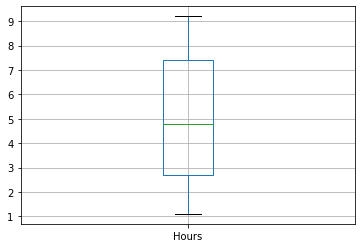

In [8]:
df.boxplot(['Hours'])

<AxesSubplot:>

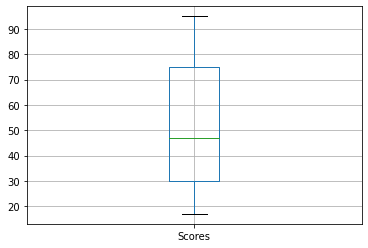

In [9]:
df.boxplot(['Scores'])

# visualising the Data with scatter plots

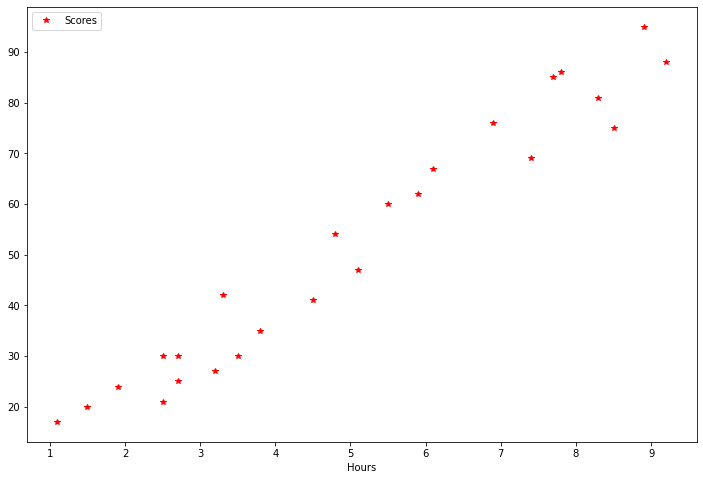

In [10]:
plt.rcParams["figure.figsize"]=[12,8]
df.plot(x = 'Hours', y='Scores', style = '*', color = 'red')
plt.xlabel = 'Hours'
plt.ylabel = 'Scores'
plt.title = 'Hours VS Scores'

# Analysis with the Help of correlations matrics

<AxesSubplot:>

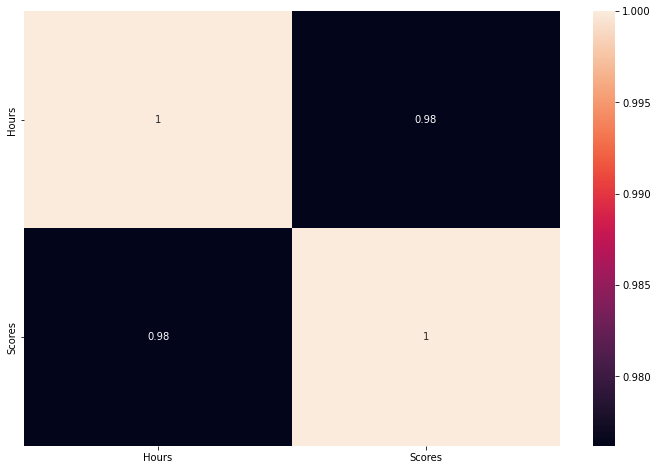

In [11]:
sns.heatmap(df.corr(),annot=True)

#### with the correlation matrix heat map we can find the positive correlation between the Scores and Hours.

# Preparing the trining data for linear regression

In [12]:
# Preparing the training data for linear regression

x = df.drop(['Scores'], axis = 1).values
y = df.Scores.values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [13]:
lr.coef_

array([9.91065648])

In [14]:
lr.intercept_

2.018160041434683

# Plotting the Line of Regression

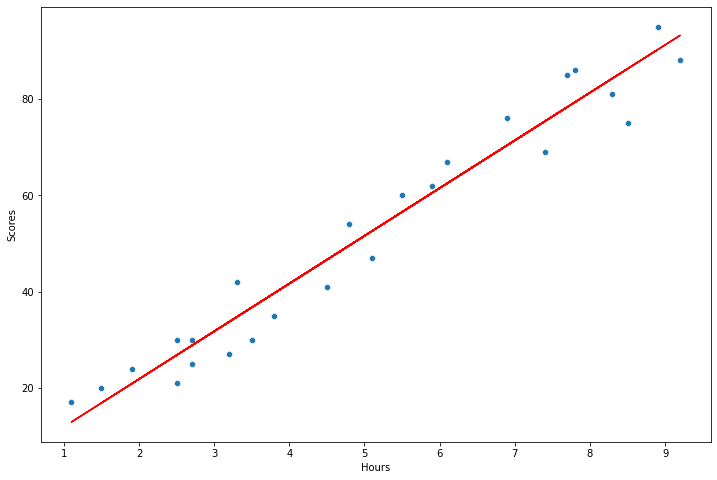

In [15]:
# Plotting the Line of Regression

line = lr.coef_*x +lr.intercept_
sns.scatterplot(x='Hours',y='Scores',data=df)
plt.title = ('Regression line')
plt.plot(x, line,c='r')
plt.show()

###### From above line of regression we could make predictions

In [16]:
# Making predections
y_preds = lr.predict(x_test)
y_preds

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# Training Scores

In [17]:
# Training Score
print('Traning Score', lr.score(x_train,y_train))

Traning Score 0.9515510725211552


# Testing Scores

In [18]:
# Testing Score
print('Testing Score', lr.score(x_test,y_test))

Testing Score 0.9454906892105356


# Comparing Actual Score and Predicted Score

In [19]:
# Comparing Actual Score and Predicted Score
df2 = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': y_preds})
df2

,Actual Score,Predicted Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Mean absolute error

In [20]:
# Mean absolute error
print('Mean absolute error : ', metrics.mean_absolute_error(y_test, y_preds))

Mean absolute error :  4.183859899002975


In [21]:
# Root mean square error
print('Root mean square error : ', metrics.mean_absolute_error(y_test, y_preds))

Root mean square error :  4.183859899002975


# Root_score

In [22]:
# Root_score
print('Root_score : ', metrics.r2_score(y_test,y_preds))

Root_score :  0.9454906892105356


# what would be the scores for student who is studying 9.25 hrs a day?

###### by using y = mx + c we can predict the score with mean absolute error..

In [23]:
# What will be predicted score if a student study for 9.25 hrs in a day?
# Using the formula y = mx + c , where m = coeffiecient , c = intercept

y = lr.coef_ * 9.5 + lr.intercept_
print('Y:',y)

Y: [96.16939661]


###### By using supervised machine learning we could say we predicted the score of 96.17 for the student who studying 9.25 hrs in day.

# Thank you !